In [1]:
import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd

import acquire
from prepare import df_cleaner

from bs4 import BeautifulSoup as bs

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['typelevel/cats', 'nyaadevs/nyaa', 'httpcats/http.cat', 'AlexiaJM/Deep-learning-with-cats', 'sharkdp/bat', 'typelevel/cats-effect', 'funcool/cats', 'websockets/wscat', 'owenthereal/ccat', 'absolute-quantum/cats-blender-plugin']


## Step 1: Use repo list to acquire repo information

In [ ]:
df = pd.read_csv('repo_list.csv')
df

Executed acqire in the terminal.

## Step 2: Convert json file to dataframe

In [ ]:
f = open('data.json')

data = json.load(f)

df_repos_raw = pd.DataFrame(data)

In [ ]:
df_repos_raw.info()

## Step 3: Prepare and clean

In [ ]:
df_repos_raw.iloc[5][1]    
#0 is repo
#1 is language
#2 is readme_contents

In [ ]:
df_holder = []
extra_words = []
exclude_words = []

for rows in df_repos_raw.index:
    row = {}
    repo = df_repos_raw.iloc[rows][0]
    language = df_repos_raw.iloc[rows][1]
    readme_contents = df_repos_raw.iloc[rows][2]
    
    row['repo'] = repo
    row['language'] = language
    row['readme_contents'] = readme_contents
    
    row['cleaned'] = full_clean(readme_contents,extra_words,exclude_words)
    
    df_holder.append(row)
df = pd.DataFrame(df_holder)

# Cleaning Dataframe

In [ ]:
from bs4 import BeautifulSoup as bs
rf = df.readme_contents[4]
soup = bs(rf, 'lxml').text

In [ ]:
# Remove r'(\n)+'
# Remove all https:
# remove all words longer than 14 characters (5 stds over normal)

In [ ]:
#split the string into words
split_soup = soup.split(' ')
word_list = []

for word in split_soup:
    if re.search(r"\n", word):
        continue
    if re.match(r'https:', word):
        continue
    if len(word) > 14:
        continue
    else:
        word_list.append(word)

scrubbed = ' '.join(word_list)

In [ ]:
df_holder = []
extra_words = []
exclude_words = []

for rows in df_repos_raw.index:
    row = {}
    repo = df_repos_raw.iloc[rows][0]
    language = df_repos_raw.iloc[rows][1]
    readme_contents = df_repos_raw.iloc[rows][2]
    
    row['repo'] = repo
    row['language'] = language
    row['readme_contents'] = readme_contents
    
    row['cleaned'] = full_clean(readme_contents,extra_words,exclude_words)
    
    df_holder.append(row)
df = pd.DataFrame(df_holder)

In [ ]:
df

---

# Testing!

##### Step 1: Loaded libraries at the top, as well as beautiful soup below.

##### Step 2: Run acquire on repo list (limited to top 10):

*Run this in the terminal, then run the following:*

In [8]:
df = acquire.json_to_df()

In [9]:
df

,repo,language,readme_contents
0,typelevel/cats,Scala,## Cats\n\n![Cats graphic](https://typelevel.o...
1,nyaadevs/nyaa,Python,# NyaaV2 [![Build Status](https://travis-ci.or...
2,httpcats/http.cat,JavaScript,# http.cat [![Build Status](https://travis-ci...
3,AlexiaJM/Deep-learning-with-cats,Python,# Deep-learning-with-cats\n\nThis repository i...
4,sharkdp/bat,Rust,"<p align=""center"">\n <img src=""doc/logo-heade..."
...,...,...,...
995,RomanKornev/dogs-vs-cats-redux,Jupyter Notebook,# Dogs vs Cats\nPredict whether a given image ...
996,snap-research/CAT,Python,# CAT\n[CVPR](https://openaccess.thecvf.com/co...
997,datitran/Dogs-vs-Cats,Jupyter Notebook,# Dogs-vs-Cats\n\nA fun project to differentia...
998,bastakka/popcatindicator,Shell,# popcatindicator\nVolume indicator with Cat p...


##### Step 3: Prepare!

In [10]:
df_cleaned = df_cleaner(df)

In [11]:
df_cleaned

,repo,language,readme_contents,cleaned
0,typelevel/cats,Scala,## Cats\n\n![Cats graphic](https://typelevel.o...,scala version continuous contributor open libr...
1,nyaadevs/nyaa,Python,# NyaaV2 [![Build Status](https://travis-ci.or...,nyaav2 build setting project us python 37 feat...
2,httpcats/http.cat,JavaScript,# http.cat [![Build Status](https://travis-ci...,httpcat build cat website hosted code older ve...
3,AlexiaJM/Deep-learning-with-cats,Python,# Deep-learning-with-cats\n\nThis repository i...,repository toy project gain experience buildin...
4,sharkdp/bat,Rust,"<p align=""center"">\n <img src=""doc/logo-heade...",cat1 clone syntax highlighting git feature use...
...,...,...,...,...
995,RomanKornev/dogs-vs-cats-redux,Jupyter Notebook,# Dogs vs Cats\nPredict whether a given image ...,dog v whether given image cat dog 997 accuracy...
996,snap-research/CAT,Python,# CAT\n[CVPR](https://openaccess.thecvf.com/co...,tutorial method used mobile implementation met...
997,datitran/Dogs-vs-Cats,Jupyter Notebook,# Dogs-vs-Cats\n\nA fun project to differentia...,fun project differentiate dog kaggle create da...
998,bastakka/popcatindicator,Shell,# popcatindicator\nVolume indicator with Cat p...,indicator cat pop theme step one clone step tw...


## Examine Data

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1000 non-null   object
 1   language         940 non-null    object
 2   readme_contents  1000 non-null   object
 3   cleaned          1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


Check on the nulls.

In [79]:
df_cleaned_no_nulls = df_cleaned[~df_cleaned.language.isnull()]
df_cleaned_no_nulls

,repo,language,readme_contents,cleaned
0,typelevel/cats,Scala,## Cats\n\n![Cats graphic](https://typelevel.o...,scala version continuous contributor open libr...
1,nyaadevs/nyaa,Python,# NyaaV2 [![Build Status](https://travis-ci.or...,nyaav2 build setting project us python 37 feat...
2,httpcats/http.cat,JavaScript,# http.cat [![Build Status](https://travis-ci...,httpcat build cat website hosted code older ve...
3,AlexiaJM/Deep-learning-with-cats,Python,# Deep-learning-with-cats\n\nThis repository i...,repository toy project gain experience buildin...
4,sharkdp/bat,Rust,"<p align=""center"">\n <img src=""doc/logo-heade...",cat1 clone syntax highlighting git feature use...
...,...,...,...,...
995,RomanKornev/dogs-vs-cats-redux,Jupyter Notebook,# Dogs vs Cats\nPredict whether a given image ...,dog v whether given image cat dog 997 accuracy...
996,snap-research/CAT,Python,# CAT\n[CVPR](https://openaccess.thecvf.com/co...,tutorial method used mobile implementation met...
997,datitran/Dogs-vs-Cats,Jupyter Notebook,# Dogs-vs-Cats\n\nA fun project to differentia...,fun project differentiate dog kaggle create da...
998,bastakka/popcatindicator,Shell,# popcatindicator\nVolume indicator with Cat p...,indicator cat pop theme step one clone step tw...


In [51]:
asdf = df_cleaned_no_nulls.readme_contents[999]
asdf

'# Throwdown_bot\nCloud Animation Throwdown (CAT) Bot. \n\nsource from http://tiny.cc/AT_Beta\n'

In [52]:
len(asdf)

90

In [53]:
fdsa = df_cleaned_no_nulls.cleaned[999]
fdsa

'animation throwdown cat bot'

In [54]:
len(fdsa)

27

Remove nulls

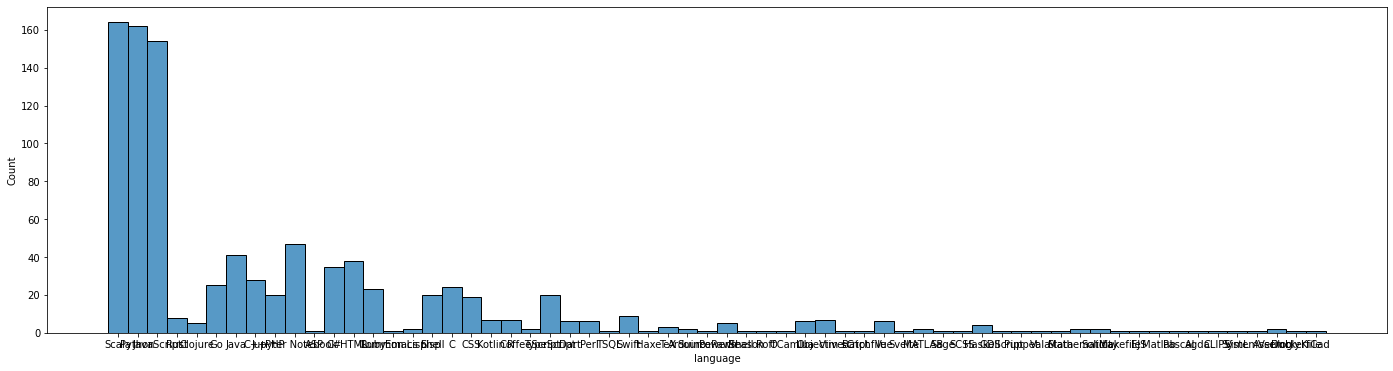

In [25]:
plt.figure(figsize = (24,6))
sns.histplot(df_cleaned_no_nulls['language'])
plt.show()

In [35]:
string_lengths = []
for i in df_cleaned_no_nulls.cleaned:
    string_lengths.append(len(i))
string_lengths.sort()

In [65]:
df_cleaned_no_nulls.cleaned.str.split(' ')

0      [scala, version, continuous, contributor, open...
1      [nyaav2, build, setting, project, us, python, ...
2      [httpcat, build, cat, website, hosted, code, o...
3      [repository, toy, project, gain, experience, b...
4      [cat1, clone, syntax, highlighting, git, featu...
                             ...                        
995    [dog, v, whether, given, image, cat, dog, 997,...
996    [tutorial, method, used, mobile, implementatio...
997    [fun, project, differentiate, dog, kaggle, cre...
998    [indicator, cat, pop, theme, step, one, clone,...
999                     [animation, throwdown, cat, bot]
Name: cleaned, Length: 940, dtype: object

In [92]:
df_cleaned_no_nulls['cleaned_length'] = df_cleaned_no_nulls.cleaned.str.split(' ').str.len()

/var/folders/nw/8yyyyp8n70vbplhdsylyqs8c0000gn/T/ipykernel_15256/2451193437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_no_nulls['cleaned_length'] = df_cleaned_no_nulls.cleaned.str.split(' ').str.len()


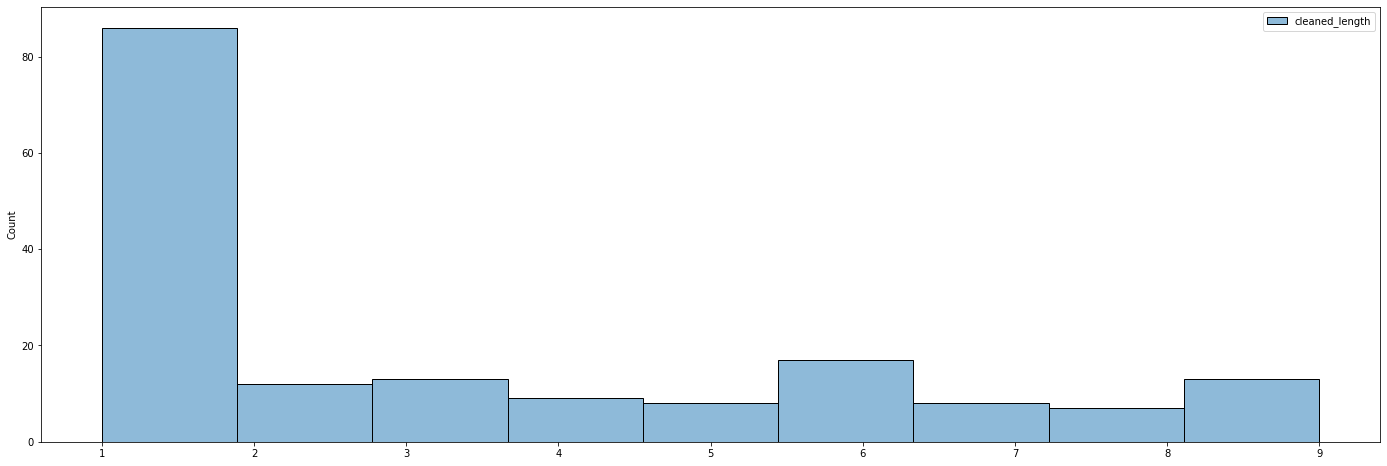

In [106]:
plt.figure(figsize = (24,8))
sns.histplot(df_cleaned_no_nulls[df_cleaned_no_nulls.cleaned_length < 10])
plt.show()

In [107]:
df_cleaned_no_nulls.cleaned_length.describe()

count      940.000000
mean       164.369149
std        462.498082
min          1.000000
25%         18.000000
50%         63.000000
75%        169.250000
max      10519.000000
Name: cleaned_length, dtype: float64

In [113]:
iqr_list = []
k=3
for col in ['cleaned_length']:
    dict_list={}
    variable = df_cleaned_no_nulls[col]
    q1 = variable.quantile(.25)
    q2 = variable.median()
    q3 = variable.quantile(.75)
    irq = k * (q3 - q1)
    high_outlier_cutoff = q3 + irq
    if (q1 - irq) > 0:
        low_outlier_cutoff = q1 - irq
    else:
        low_outlier_cutoff = 0
    dict_list['Variable'] = col
    dict_list['Low Outliers'] = low_outlier_cutoff
    dict_list['25% Quantile'] = q1
    dict_list['Median'] = q2
    dict_list['75% Quantile'] = q3
    dict_list['High Outliers'] = high_outlier_cutoff
    iqr_list.append(dict_list)
pd.DataFrame(iqr_list).set_index('Variable')

,Low Outliers,25% Quantile,Median,75% Quantile,High Outliers
Variable,,,,,
cleaned_length,0,18.0,63.0,169.25,623.0


In [119]:
df_cleaned_no_nulls[df_cleaned_no_nulls.cleaned_length < 10]

,repo,language,readme_contents,cleaned,cleaned_length
11,Luohuayu/CatServer,Java,,,1
13,tpolecat/natchez,Scala,# Natchez Trace\n\n[![Discord](https://img.shi...,natchez chat distributed tracing library proceed,6
40,typelevel/cats-parse,Scala,docs/index.md,docsindexmd,1
45,udacity/ud989-cat-clicker-ko-starter,HTML,ud989-cat-clicker-ko-starter\n================...,,1
49,kastnerkyle/kaggle-dogs-vs-cats,Python,kaggle-cifar10\n==============\n\nCode for Kag...,kaggle dog v cat,4
...,...,...,...,...,...
963,dcarriger/cat-repo,Python,,,1
978,wzyanqi/dogs-vs-cats,Jupyter Notebook,# dogs-vs-cats\n[猫狗大战](https://www.kaggle.com/...,file3csv modelpng 25pdf,3
980,hawkrai/CATSdesigner,C#,# CATSdesigner\n,,1
984,kdszafranski/omicron_express_review,JavaScript,# Node-Express with Cats!\n,nodeexpress,1


In [126]:
df_cleaned_no_nulls[df_cleaned_no_nulls.repo == 'notwaldorf/cat-dns']

,repo,language,readme_contents,cleaned,cleaned_length
50,notwaldorf/cat-dns,JavaScript,cat-dns\n=======\n\nThe Internet needs more ca...,internet need cat dns server authority thing i...,223


In [131]:
import numpy as np
np.quantile(df_cleaned_no_nulls.cleaned_length, .20)

11.0

##### We are going to drop the bottom 20% and then use that.

In [132]:
df_working = df_cleaned_no_nulls[df_cleaned_no_nulls.cleaned_length > 11]
df_working

,repo,language,readme_contents,cleaned,cleaned_length
0,typelevel/cats,Scala,## Cats\n\n![Cats graphic](https://typelevel.o...,scala version continuous contributor open libr...,541
1,nyaadevs/nyaa,Python,# NyaaV2 [![Build Status](https://travis-ci.or...,nyaav2 build setting project us python 37 feat...,519
2,httpcats/http.cat,JavaScript,# http.cat [![Build Status](https://travis-ci...,httpcat build cat website hosted code older ve...,86
3,AlexiaJM/Deep-learning-with-cats,Python,# Deep-learning-with-cats\n\nThis repository i...,repository toy project gain experience buildin...,214
4,sharkdp/bat,Rust,"<p align=""center"">\n <img src=""doc/logo-heade...",cat1 clone syntax highlighting git feature use...,1517
...,...,...,...,...,...
993,imfing/keras-flask-deploy-webapp,JavaScript,# Deploy Keras Model with Flask as Web App in ...,deploy kera model flask web app 10 pretty cust...,165
995,RomanKornev/dogs-vs-cats-redux,Jupyter Notebook,# Dogs vs Cats\nPredict whether a given image ...,dog v whether given image cat dog 997 accuracy...,108
996,snap-research/CAT,Python,# CAT\n[CVPR](https://openaccess.thecvf.com/co...,tutorial method used mobile implementation met...,458
997,datitran/Dogs-vs-Cats,Jupyter Notebook,# Dogs-vs-Cats\n\nA fun project to differentia...,fun project differentiate dog kaggle create da...,29


<AxesSubplot:>

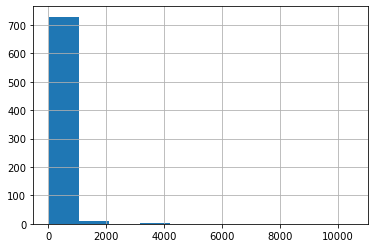

In [133]:
df_working.cleaned_length.hist()

# UNIVARIATE EXPLORATION
1. Remove Nulls
2. Create word count column
3. Run univariate stats on language (target) and word column

In [141]:
df_working.language.value_counts()

Scala               148
Python              127
JavaScript          118
Jupyter Notebook     35
HTML                 28
C++                  26
C#                   22
C                    22
Go                   21
Ruby                 19
Java                 18
Shell                17
TypeScript           17
PHP                  16
CSS                  13
Rust                  8
Kotlin                6
R                     6
Swift                 6
Clojure               5
Objective-C           5
Haskell               4
Vue                   4
Lua                   4
Dart                  4
Perl                  3
PowerShell            3
TeX                   2
CoffeeScript          2
Assembly              2
MATLAB                2
Emacs Lisp            2
Dockerfile            1
Mathematica           1
Solidity              1
Makefile              1
EJS                   1
SystemVerilog         1
Matlab                1
Vala                  1
Pascal                1
Agda            

In [140]:
df_working.language.value_counts()[df_working.language.value_counts()<6].sum()

70